### This script uses the Facebook's open source software 'Prophet' to forecast the spread of COVID-19 worlwide for a defined future timeframe. We are using Prophet here beacuse the model to missing data, shifts in the trend and handles outliers well 

![alt text](https://cdn.weka-fachmedien.de/thumbs/media_uploads/images/1584632058-339-worrlgjo3.jpg.950x534.jpg)

In [28]:
#import the necessary packages
import pandas as pd
from fbprophet import Prophet
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [29]:
#loading the required datasets
df = pd.read_csv('../data/covid_19_data.csv')
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)
#df['Date'] = pd.to_datetime(df['Date'])
df.drop('SNo', axis=1, inplace = True)

df_confirmed = pd.read_csv("../data/time_series_covid_19_confirmed.csv")
df_recovered = pd.read_csv("../data/time_series_covid_19_recovered.csv")
df_deaths = pd.read_csv("../data/time_series_covid_19_deaths.csv")

df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [30]:
#Overall worldwide Confirmed/ Deaths/ Recovered cases 
df.groupby('Date').sum().head(5)

,Confirmed,Deaths,Recovered
Date,,,
01/22/2020,555.0,17.0,28.0
01/23/2020,653.0,18.0,30.0
01/24/2020,941.0,26.0,36.0
01/25/2020,1438.0,42.0,39.0
01/26/2020,2118.0,56.0,52.0


In [31]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

The input to Prophet is always a dataframe with two columns: **ds** and **y**. The **ds (datestamp)** column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [32]:
confirmed['Confirmed'] = confirmed['Confirmed'].astype(int)
deaths['Deaths'] = deaths['Deaths'].astype(int)
recovered['Recovered'] = recovered['Recovered'] .astype(int)

confirmed.columns = ['ds','y']
deaths.columns = ['ds','y']
recovered.columns = ['ds','y']

## Forecasting global confirmed cases using Prophet (Base model)

Forecasting the comfirmed cases globally for a week's timeframe in advance, with 98% confidence interval. We are use the basic model here with no tweaking of seasonality-related parameters and additional regressors.

In [33]:
model = Prophet(interval_width=0.98)
model.fit(confirmed)
future_confirmed_cases = model.make_future_dataframe(periods=7)
#future_confirmed_cases.tail(7)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### Forecasting the future confirmed cases globally for the next 1 week

In [34]:
forecast = model.predict(future_confirmed_cases)
forecast_coming_week = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

In [35]:
forecast_coming_week.style.background_gradient(cmap='Reds')

,ds,yhat,yhat_lower,yhat_upper
72,2020-04-03 00:00:00,973541.082389,925302.201336,1019469.552191
73,2020-04-04 00:00:00,1023735.216118,977160.845754,1072111.259012
74,2020-04-05 00:00:00,1073406.960368,1026749.821447,1120931.675726
75,2020-04-06 00:00:00,1124257.312467,1072401.131149,1177695.209900
76,2020-04-07 00:00:00,1176801.164304,1125644.986547,1230120.507503
77,2020-04-08 00:00:00,1230745.040882,1175230.093023,1289491.429559
78,2020-04-09 00:00:00,1282936.394647,1219930.331287,1349333.732411


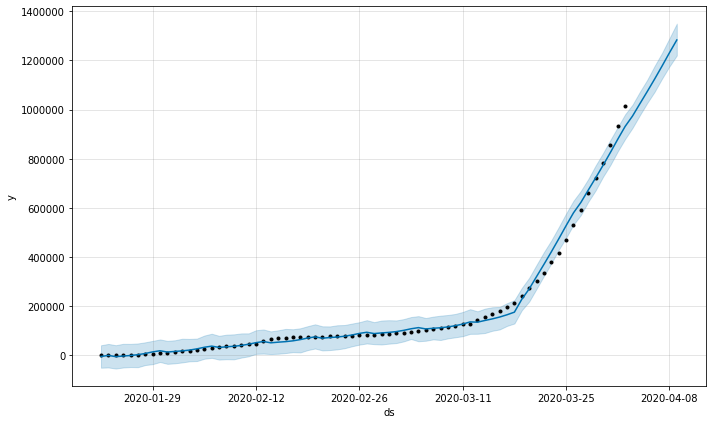

In [36]:
#Plotting the forecast with the confidence interval of 98 percent
confirmed_forecast_plot = model.plot(forecast)

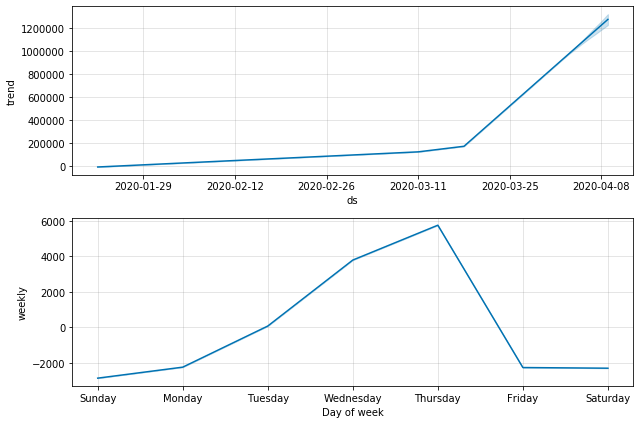

In [37]:
#plotting the forcast for upcoming 7 days
confirmed_forecast_plot = model.plot_components(forecast)

## Forecasting global death cases using Prophet (Base model)

Forecasting the death cases globally for a week's timeframe in advance, with 98% confidence interval. We are use the basic model here with no tweaking of seasonality-related parameters and additional regressors.

In [38]:
model = Prophet(interval_width=0.98)
model.fit(deaths)
future_death_cases = model.make_future_dataframe(periods=7)
#future_death_cases.tail(7)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### Forecasting the future confirmed cases globally for the next 1 week

In [39]:
forecast = model.predict(future_death_cases)
forecast_coming_week = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

In [40]:
forecast_coming_week.style.background_gradient(cmap='Reds')

,ds,yhat,yhat_lower,yhat_upper
72,2020-04-03 00:00:00,45189.849196,40660.663672,49185.296412
73,2020-04-04 00:00:00,47555.899688,42834.599225,51649.708890
74,2020-04-05 00:00:00,49918.628605,45631.482426,53989.517518
75,2020-04-06 00:00:00,52359.156042,48342.216233,56867.858779
76,2020-04-07 00:00:00,54705.841632,50266.171381,59568.839037
77,2020-04-08 00:00:00,57155.597328,52354.207506,61554.656221
78,2020-04-09 00:00:00,59726.387564,55388.727794,63998.246381


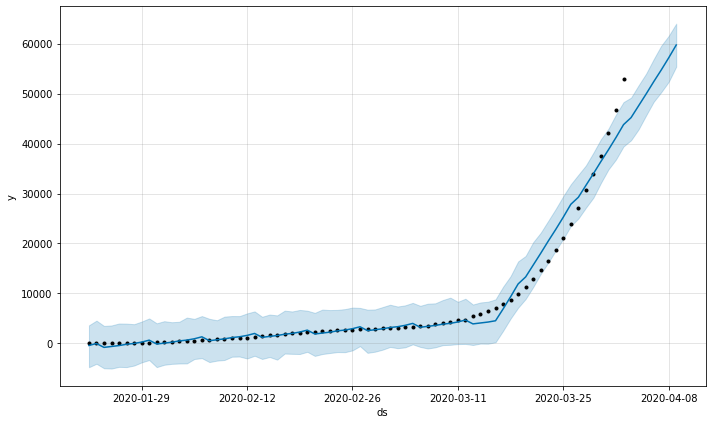

In [41]:
#Plotting the forecast with the confidence interval of 98 percent
death_forecast_plot = model.plot(forecast)

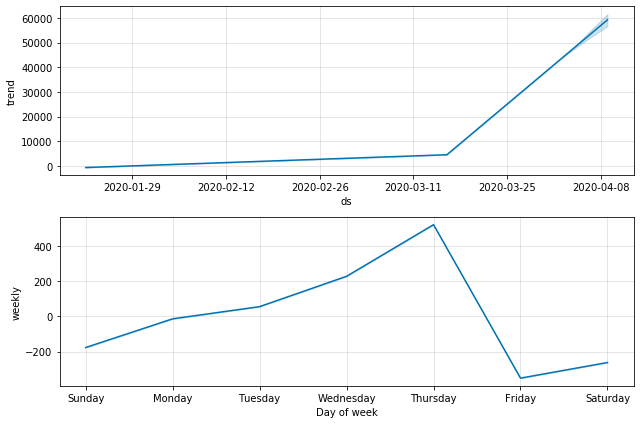

In [42]:
#plotting the forcast for upcoming 7 days
death_forecast_plot = model.plot_components(forecast)

## Forecasting global recovery cases using Prophet (Base model)

Forecasting the recovery cases globally for a week's timeframe in advance, with 98% confidence interval. We are use the basic model here with no tweaking of seasonality-related parameters and additional regressors.

In [43]:
model = Prophet(interval_width=0.98)
model.fit(recovered)
future_recovered_cases = model.make_future_dataframe(periods=7)
#future_death_cases.tail(7)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### Forecasting the future confirmed cases globally for the next 1 week

In [44]:
forecast = model.predict(future_recovered_cases)
forecast_coming_week = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

In [45]:
#printing the predicted values for coming week
forecast_coming_week.style.background_gradient(cmap='Reds')

,ds,yhat,yhat_lower,yhat_upper
72,2020-04-03 00:00:00,186921.043041,173371.355637,200840.595763
73,2020-04-04 00:00:00,193838.214599,181073.413664,207676.773915
74,2020-04-05 00:00:00,200756.099869,187205.525822,213515.652528
75,2020-04-06 00:00:00,208038.347088,193959.899797,222368.569806
76,2020-04-07 00:00:00,215578.099416,201215.881572,229520.027220
77,2020-04-08 00:00:00,223441.170211,209643.480726,236839.053582
78,2020-04-09 00:00:00,230818.064724,216784.481097,246596.799361


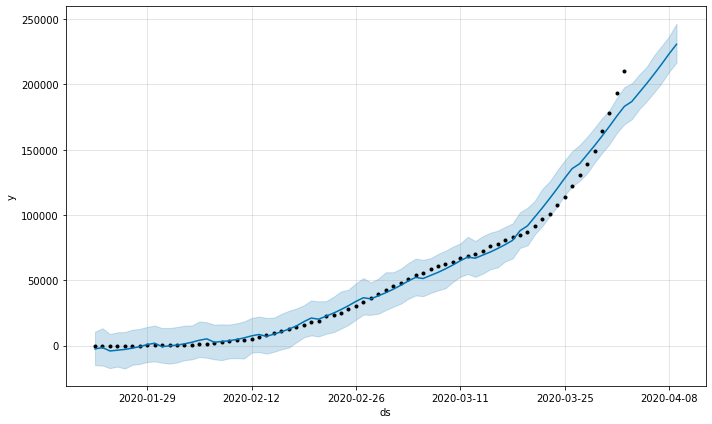

In [46]:
#Plotting the forecast with the confidence interval of 98 percent
recovery_forecast_plot = model.plot(forecast)

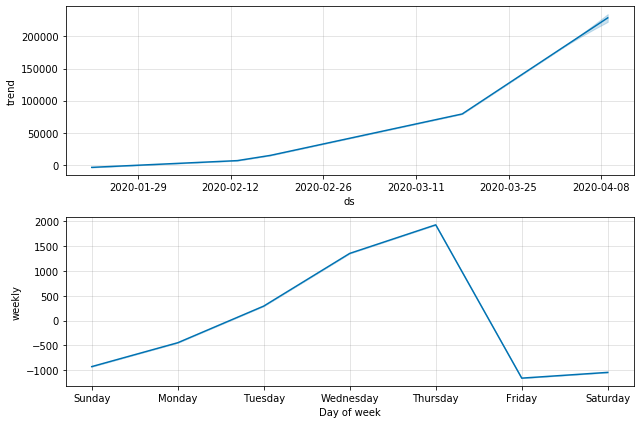

In [47]:
#plotting the forcast for upcoming 7 days
recovery_forecast_plot = model.plot_components(forecast)